In [1430]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [1431]:
#Daten einlesen aus der csv Datei
data_path = 'data.csv'
data = pd.read_csv(data_path)

# 1. EDA

In [1432]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [1508]:
data.shape

(116, 10)

Welche Variablen stehen zur Verfügung?

In [1433]:
data.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

In [1434]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [1435]:
def draw_scatter_plot(variable, target):
	plt.figure(figsize=(15, 10))
	plt.scatter(data[variable], data[target], c='blue')
	plt.xlabel(f'Investition in {variable}-Werbung')
	plt.ylabel(f'Umsatz')
	plt.show()

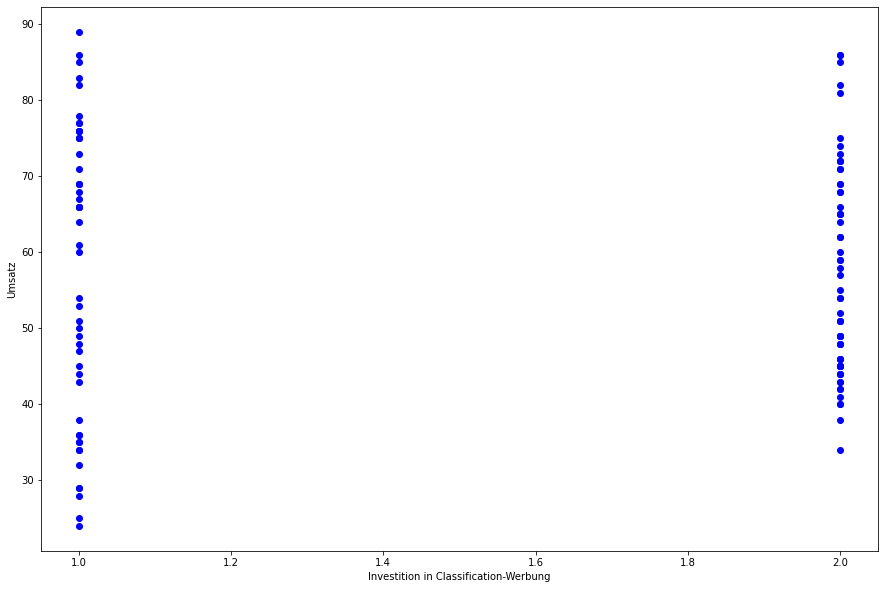

In [1436]:
draw_scatter_plot('Classification', 'Age')

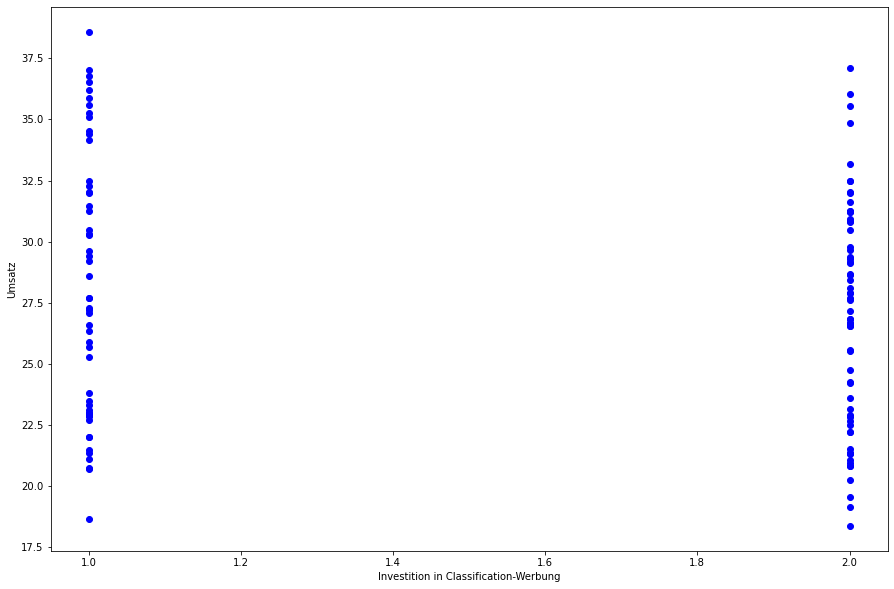

In [1437]:
draw_scatter_plot('Classification', 'BMI')

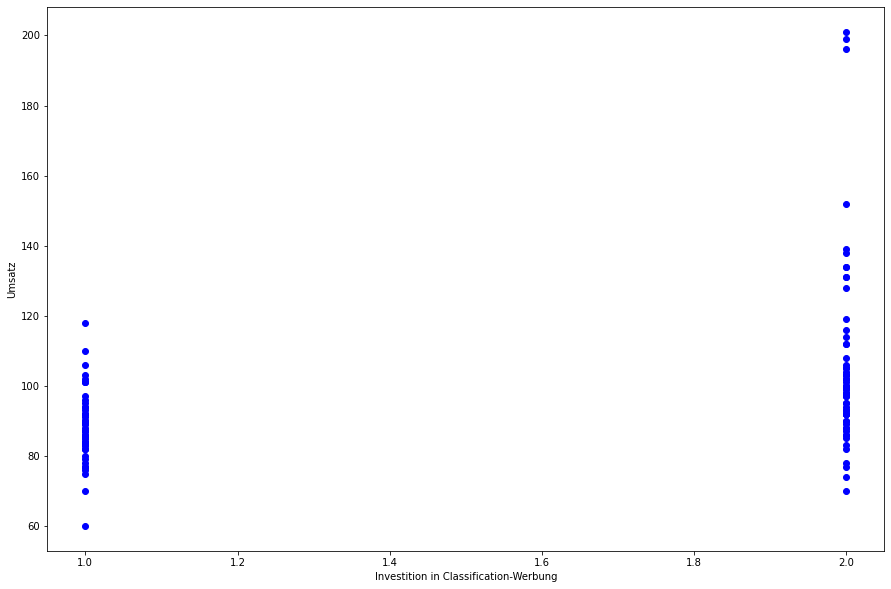

In [1438]:
draw_scatter_plot('Classification', 'Glucose')

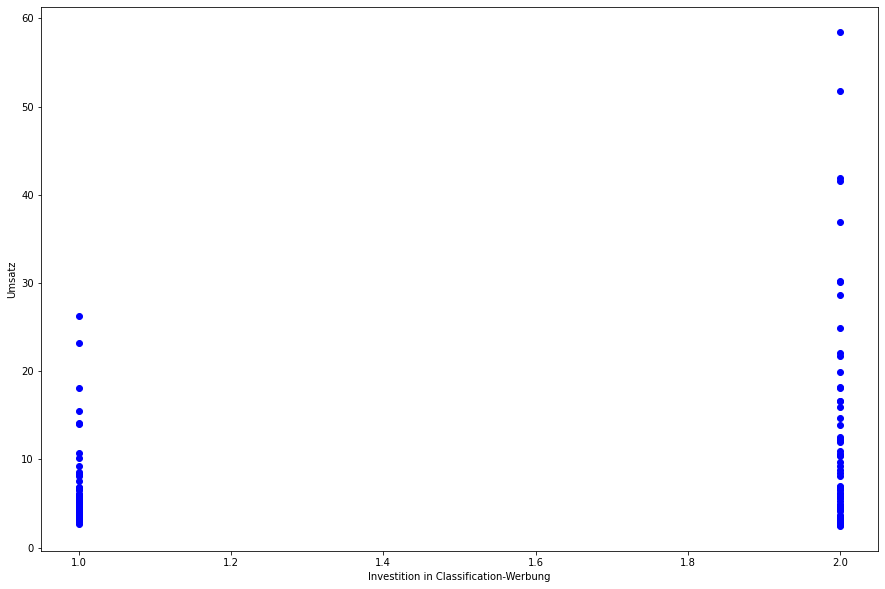

In [1439]:
draw_scatter_plot('Classification', 'Insulin')

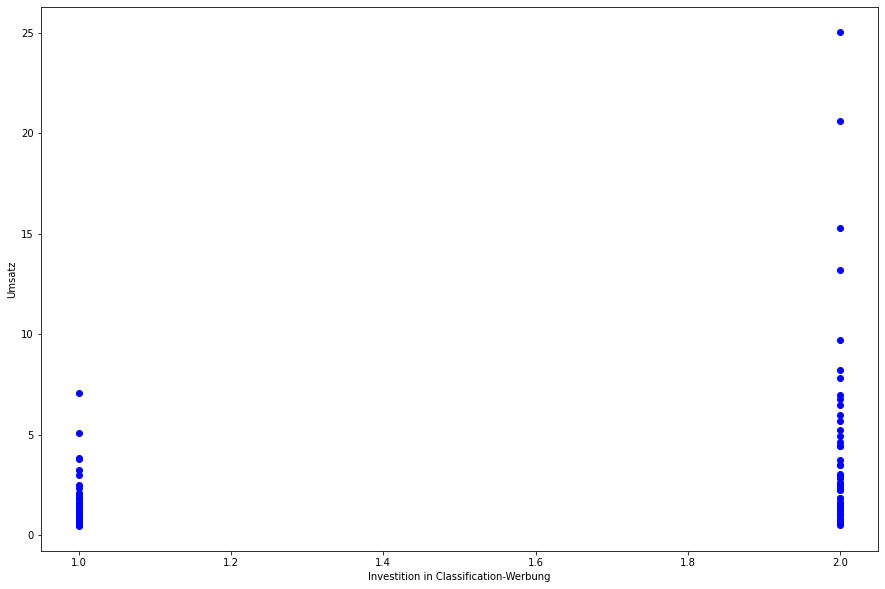

In [1440]:
draw_scatter_plot('Classification', 'HOMA')

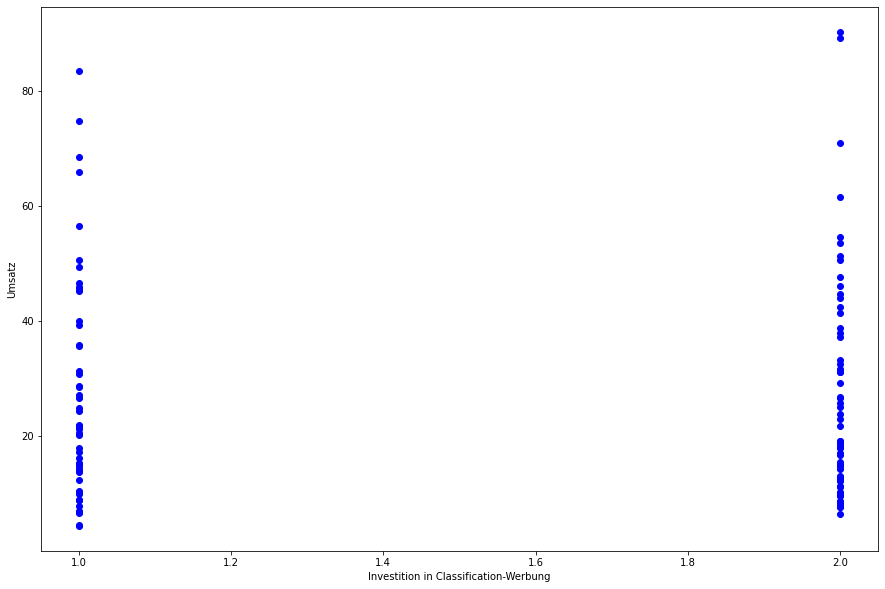

In [1441]:
draw_scatter_plot('Classification', 'Leptin')

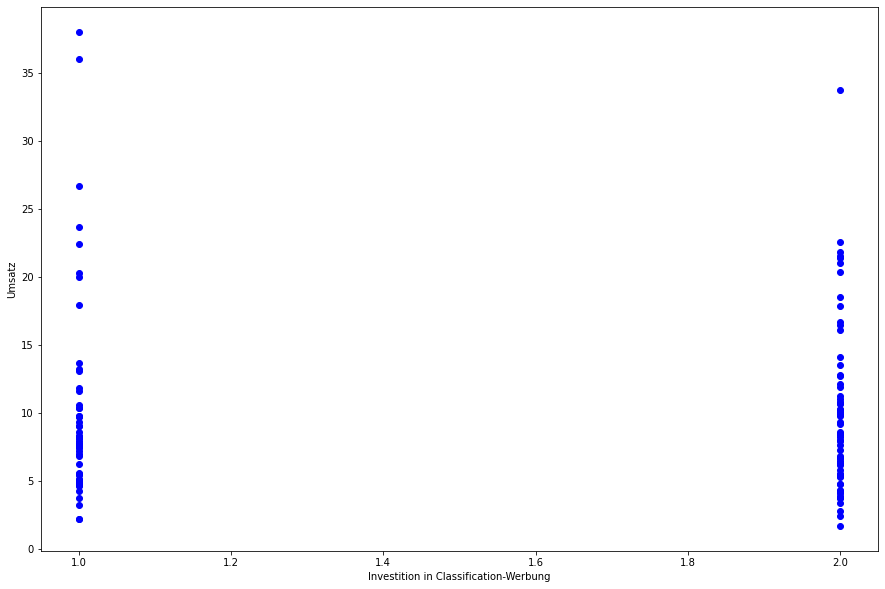

In [1442]:
draw_scatter_plot('Classification', 'Adiponectin')

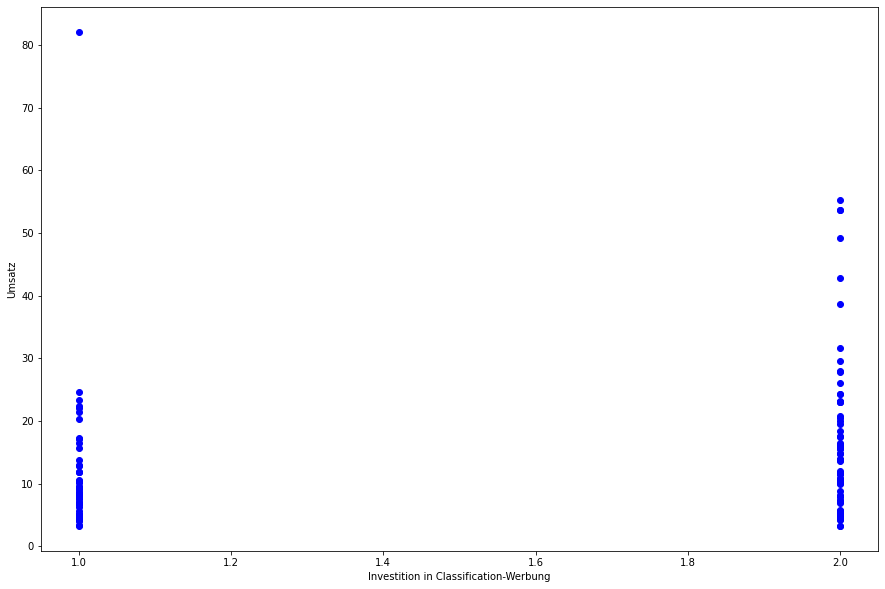

In [1443]:
draw_scatter_plot('Classification', 'Resistin')

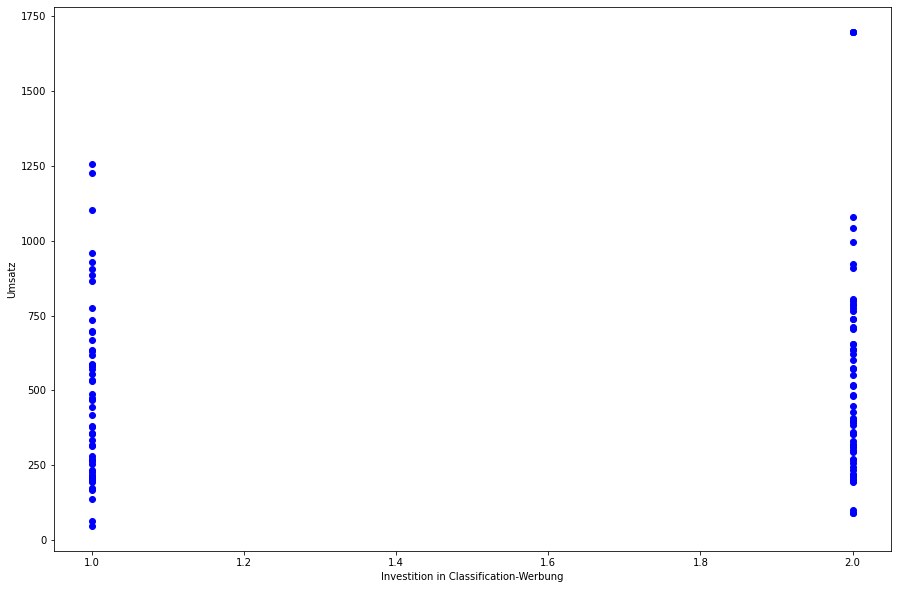

In [1444]:
draw_scatter_plot('Classification', 'MCP.1')

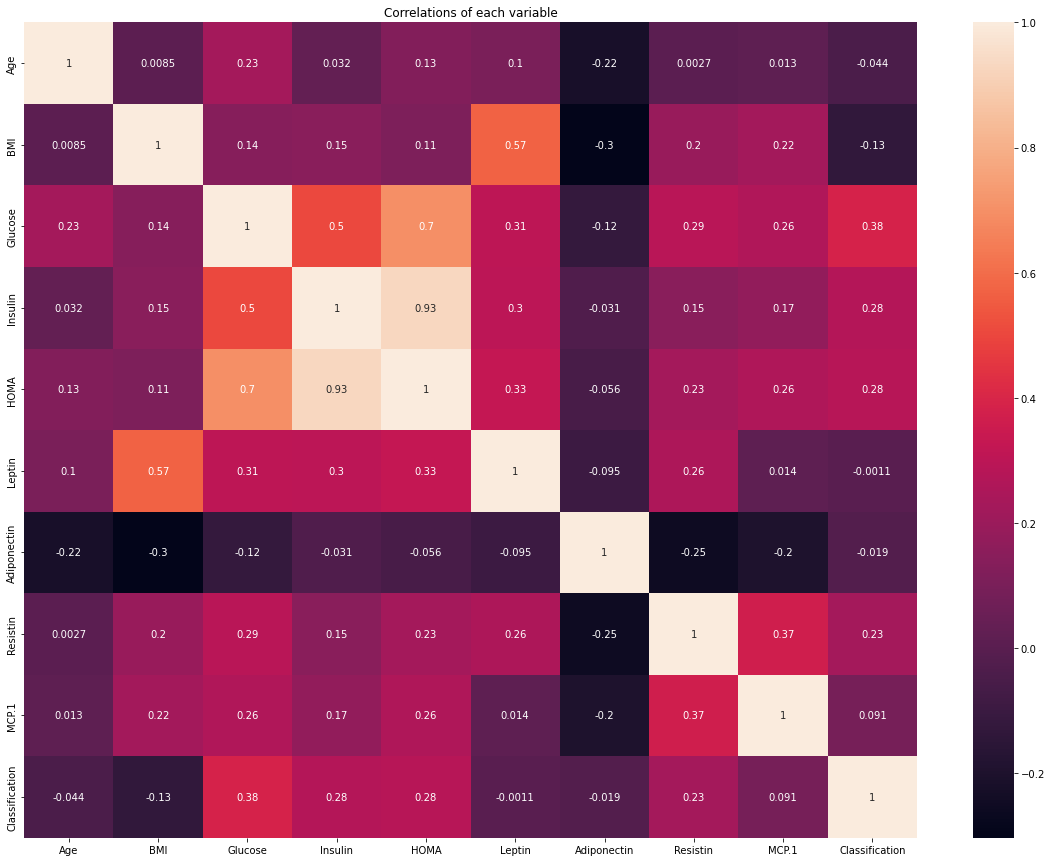

In [1445]:
corrMatrix = data.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlations of each variable")
plt.show()

#### Insulin, HOMA und Glukose weisen eine hohe Korrelation auf. BMI und Adiponectin weisen die höschste negative Korrelation auf.

# 2. PCA

In [1446]:
x = data.iloc[:, 0:9].values
y = data.iloc[:, 9].values

In [1447]:
print(x)
print(y)

[[ 48.          23.5         70.         ...   9.7024       7.99585
  417.114     ]
 [ 83.          20.69049454  92.         ...   5.429285     4.06405
  468.786     ]
 [ 82.          23.12467037  91.         ...  22.43204      9.27715
  554.697     ]
 ...
 [ 65.          32.05        97.         ...  22.54        10.33
  314.05      ]
 [ 72.          25.59        82.         ...  33.75         3.27
  392.46      ]
 [ 86.          27.18       138.         ...  14.11         4.35
   90.09      ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]


In [1448]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [1449]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1450]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
pca1, pca2 = x_train.T

In [1451]:
print(x_train)

[[ 2.49101863  1.20337798]
 [ 1.1826382   0.06745488]
 [-0.82616192 -0.15847946]
 [-0.11706302 -0.08498061]
 [ 0.10711929 -0.49894752]
 [ 1.81740475  0.31682334]
 [ 0.27725367  0.1142296 ]
 [-0.19103472  2.35198988]
 [-1.21099706 -0.02979588]
 [-2.02128539  0.81240018]
 [ 0.78609112 -1.15245042]
 [ 0.42584517 -0.97631529]
 [ 0.93526407 -0.85129338]
 [ 2.44343102  1.27832237]
 [ 0.85962187 -1.30695401]
 [-0.83815703 -1.12261575]
 [ 1.47356396 -0.57018004]
 [-0.36371465 -1.65961137]
 [-1.16879311 -0.59212911]
 [ 4.51377435 -1.42434307]
 [ 1.68296782  1.71489684]
 [-0.49451976 -1.00123699]
 [ 1.15171559 -1.01766861]
 [-1.27767771 -0.76070178]
 [ 1.03351688 -1.3967816 ]
 [-0.35035127 -0.79291164]
 [-1.08084161 -0.84534225]
 [ 1.77693538 -0.40619491]
 [-0.82573968 -0.16165253]
 [-1.00547845 -0.74086558]
 [ 0.45220744  0.09260663]
 [-1.88115236  1.86935524]
 [ 2.20708322 -0.91820613]
 [ 0.18573413  0.18733789]
 [-1.02883842 -0.40872123]
 [-0.81571669 -0.18758205]
 [-0.47346293 -0.75567058]
 

In [1452]:
pca_result = pca.explained_variance_ratio_
print('pca1 benutzt ', pca_result[0])
print('pca2 benutzt ', pca_result[1])

pca1 benutzt  0.3296208834952054
pca2 benutzt  0.18020001922189843


### pca benutzt ca. 33% der infos und pca2 ca. 18% -- somit werden ca. 52% der Infos fallen gelassen

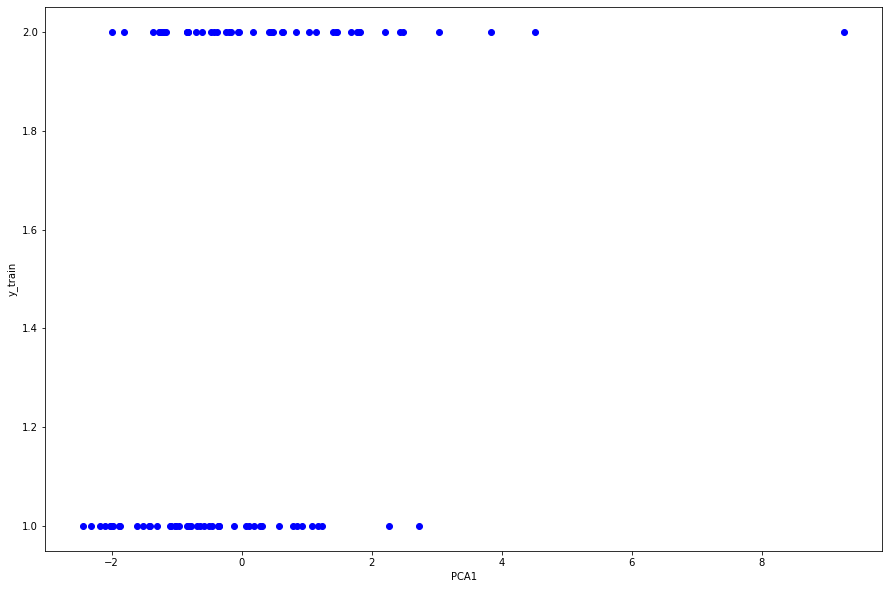

In [1453]:
plt.figure(figsize=(15, 10))
plt.scatter(pca1, y_train, c='blue')
plt.xlabel('PCA1')
plt.ylabel('y_train')
plt.show()

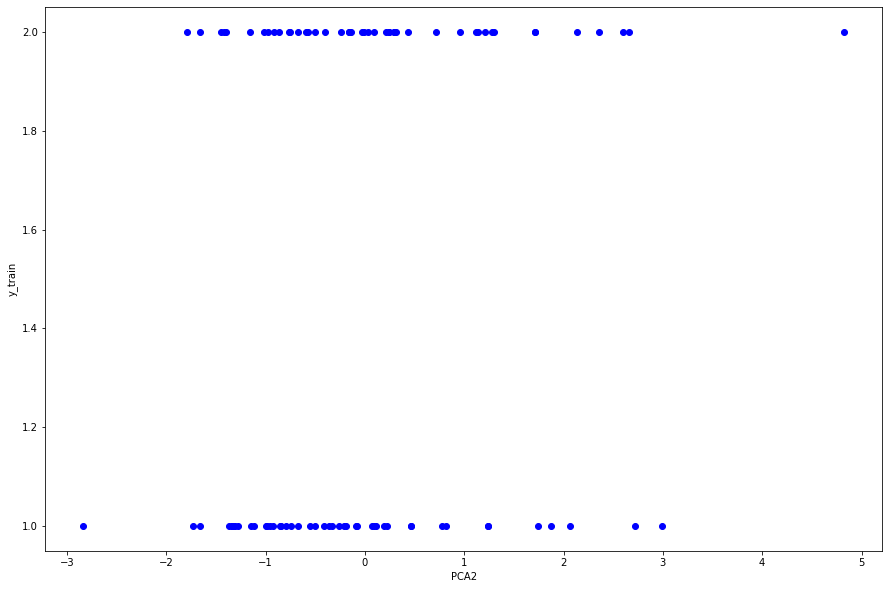

In [1454]:
plt.figure(figsize=(15, 10))
plt.scatter(pca2, y_train, c='blue')
plt.xlabel('PCA2')
plt.ylabel('y_train')
plt.show()

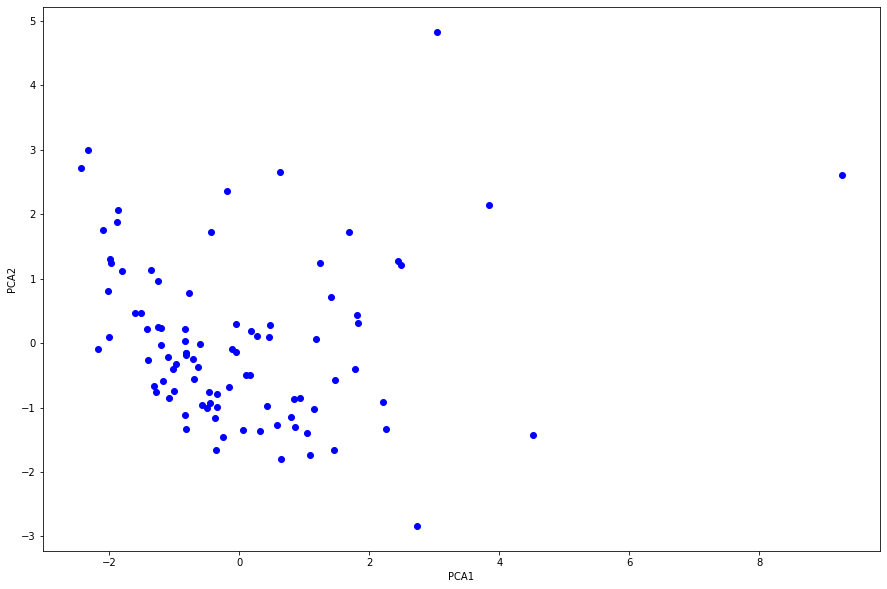

In [1455]:
plt.figure(figsize=(15, 10))
plt.scatter(pca1, pca2, c='blue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

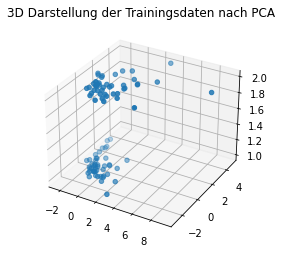

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


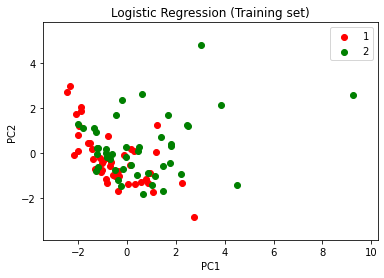

In [1456]:
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca1, pca2, y_train)
plt.title('3D Darstellung der Trainingsdaten nach PCA')
plt.show()

##%
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
	            c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

### es ist keine gute separierbarkeit erkennbar
#### da die roten und grünen Punkte konzentriert auftreten, lassen sich diese nicht leicht separieren

In [1457]:
pcat1, pcat2 = x_test.T

In [1458]:
print(x_train)

[[ 2.49101863  1.20337798]
 [ 1.1826382   0.06745488]
 [-0.82616192 -0.15847946]
 [-0.11706302 -0.08498061]
 [ 0.10711929 -0.49894752]
 [ 1.81740475  0.31682334]
 [ 0.27725367  0.1142296 ]
 [-0.19103472  2.35198988]
 [-1.21099706 -0.02979588]
 [-2.02128539  0.81240018]
 [ 0.78609112 -1.15245042]
 [ 0.42584517 -0.97631529]
 [ 0.93526407 -0.85129338]
 [ 2.44343102  1.27832237]
 [ 0.85962187 -1.30695401]
 [-0.83815703 -1.12261575]
 [ 1.47356396 -0.57018004]
 [-0.36371465 -1.65961137]
 [-1.16879311 -0.59212911]
 [ 4.51377435 -1.42434307]
 [ 1.68296782  1.71489684]
 [-0.49451976 -1.00123699]
 [ 1.15171559 -1.01766861]
 [-1.27767771 -0.76070178]
 [ 1.03351688 -1.3967816 ]
 [-0.35035127 -0.79291164]
 [-1.08084161 -0.84534225]
 [ 1.77693538 -0.40619491]
 [-0.82573968 -0.16165253]
 [-1.00547845 -0.74086558]
 [ 0.45220744  0.09260663]
 [-1.88115236  1.86935524]
 [ 2.20708322 -0.91820613]
 [ 0.18573413  0.18733789]
 [-1.02883842 -0.40872123]
 [-0.81571669 -0.18758205]
 [-0.47346293 -0.75567058]
 

In [1459]:
pca_result = pca.explained_variance_ratio_
print('pca1 benutzt ', pca_result[0])
print('pca2 benutzt ', pca_result[1])

pca1 benutzt  0.3296208834952054
pca2 benutzt  0.18020001922189843


pca benutzt ca. 33% der infos und pca2 ca. 18% -- somit werden ca. 52% der Infos fallen gelassen

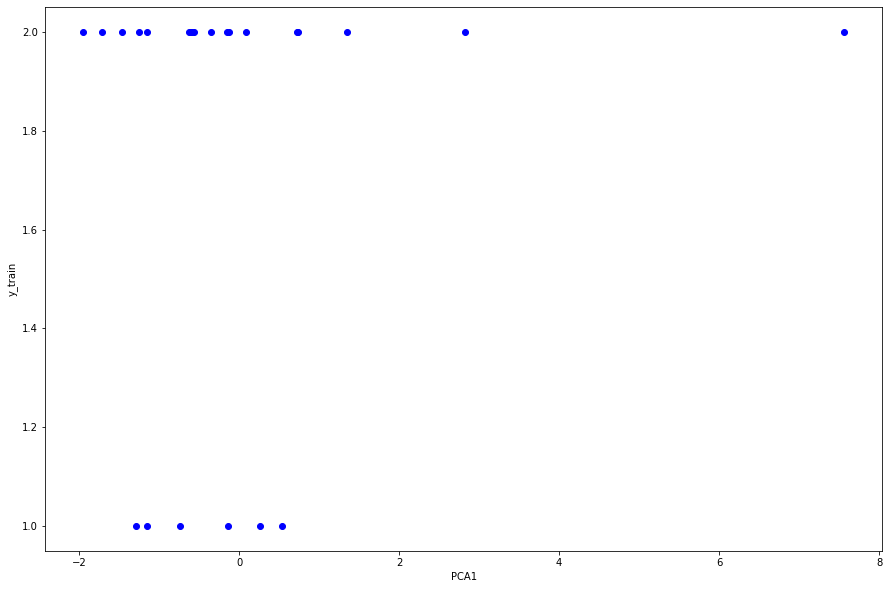

In [1460]:
plt.figure(figsize=(15, 10))
plt.scatter(pcat1, y_test, c='blue')
plt.xlabel('PCA1')
plt.ylabel('y_train')
plt.show()

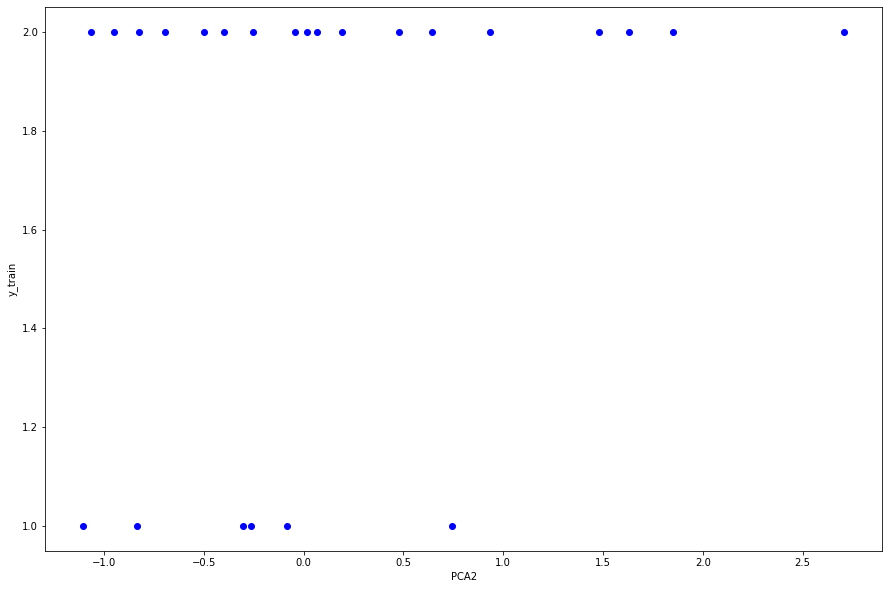

In [1461]:
plt.figure(figsize=(15, 10))
plt.scatter(pcat2, y_test, c='blue')
plt.xlabel('PCA2')
plt.ylabel('y_train')
plt.show()

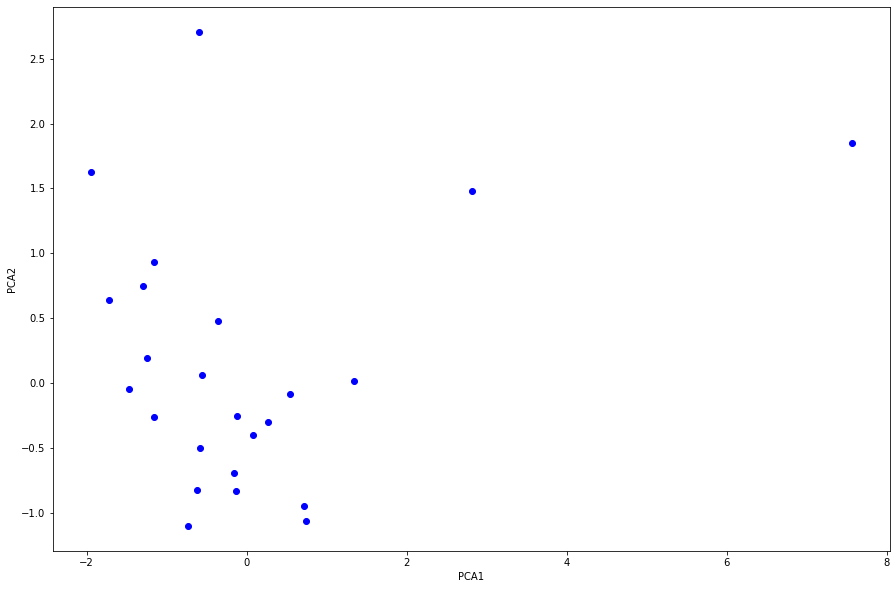

In [1462]:
plt.figure(figsize=(15, 10))
plt.scatter(pcat1, pcat2, c='blue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

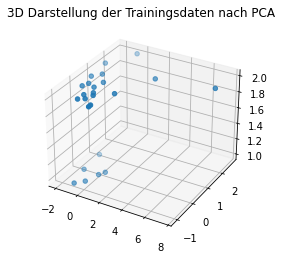

In [1463]:
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcat1, pcat2, y_test)
plt.title('3D Darstellung der Trainingsdaten nach PCA')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


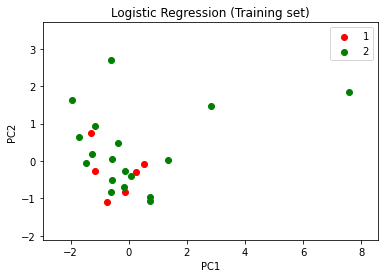

In [1464]:
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
	            c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

### es ist wieder keine gute separierbarkeit erkennbar
#### da die roten und grünen Punkte konzentriert auftreten, lassen sich diese nicht leicht separieren

# 3. Logistische Regression

In [1465]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [1466]:
predict_y = classifier.predict(x_test)
print(predict_y)

[1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 2 2 1 2]


In [1467]:
conf_matrix = confusion_matrix(y_test, predict_y)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


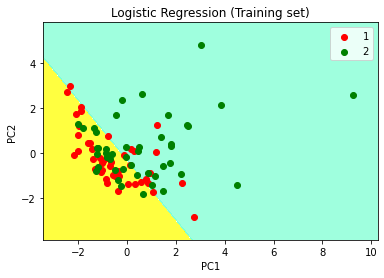

In [1468]:
# Quelle: https://de.acervolima.com/hauptkomponentenanalyse-mit-python/
# Vorhersage des Trainingssatzergebnis
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
	            c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


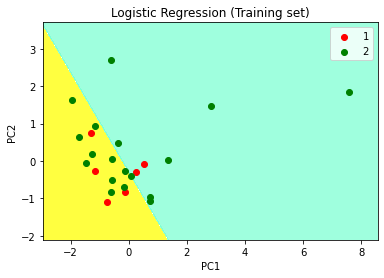

In [1469]:
# Vorhersage des Testsatzergebnis
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
	            c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

In [1470]:
print(predict_y)
print(y_test)

[1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 2 2 1 2]
[2 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 1 2 1 2 2]


In [1471]:
counter = 0
for i in range(0, len(predict_y)):
	if predict_y[i] == y_test[i]:
		counter += 1
	else:
		continue

In [1472]:
var = counter / len(predict_y)
res = var * 100
print('Wahrscheinlichkeit für die richtige Vorhersage:')
print(res, '%')

Wahrscheinlichkeit für die richtige Vorhersage:
50.0 %


# 5. Feature-Engineering

### Manche Variablen zeigen eine höhere Korrelation untereinander und haben somit einen höheren Einfluss auf die Vorhersage

In [1473]:
dataNew = data
dataNew = dataNew.drop(columns=['BMI'])

In [1474]:
x = dataNew.iloc[:, 0:8].values
y = dataNew.iloc[:, 8].values

In [1475]:
print(x)
print(y)

[[4.80000000e+01 7.00000000e+01 2.70700000e+00 4.67408667e-01
  8.80710000e+00 9.70240000e+00 7.99585000e+00 4.17114000e+02]
 [8.30000000e+01 9.20000000e+01 3.11500000e+00 7.06897333e-01
  8.84380000e+00 5.42928500e+00 4.06405000e+00 4.68786000e+02]
 [8.20000000e+01 9.10000000e+01 4.49800000e+00 1.00965107e+00
  1.79393000e+01 2.24320400e+01 9.27715000e+00 5.54697000e+02]
 [6.80000000e+01 7.70000000e+01 3.22600000e+00 6.12724933e-01
  9.88270000e+00 7.16956000e+00 1.27660000e+01 9.28220000e+02]
 [8.60000000e+01 9.20000000e+01 3.54900000e+00 8.05386400e-01
  6.69940000e+00 4.81924000e+00 1.05763500e+01 7.73920000e+02]
 [4.90000000e+01 9.20000000e+01 3.22600000e+00 7.32086933e-01
  6.83170000e+00 1.36797500e+01 1.03176000e+01 5.30410000e+02]
 [8.90000000e+01 7.70000000e+01 4.69000000e+00 8.90787333e-01
  6.96400000e+00 5.58986500e+00 1.29361000e+01 1.25608300e+03]
 [7.60000000e+01 1.18000000e+02 6.47000000e+00 1.88320133e+00
  4.31100000e+00 1.32513200e+01 5.10420000e+00 2.80694000e+02]


In [1476]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [1477]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1478]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
pca1, pca2 = x_train.T

In [1479]:
print(x_train)

[[ 4.71863281e-01 -6.14340250e-01]
 [-8.91662921e-01 -7.89291413e-01]
 [-1.02231175e+00  6.32504171e-02]
 [-2.05236973e+00  3.08041584e+00]
 [-1.80547254e+00  1.20775510e-02]
 [ 5.47917594e-01 -1.11134505e+00]
 [-9.75627351e-01 -1.24601980e+00]
 [-1.06271700e+00 -7.08780823e-01]
 [-4.40979599e-01 -2.59937829e-01]
 [-1.97874651e-02  2.00252576e+00]
 [ 8.97584062e-01  1.86779413e+00]
 [-6.23748845e-01 -3.82653538e-01]
 [-9.61524600e-01 -4.16482177e-01]
 [-2.83414428e-01 -4.54323447e-01]
 [-1.19864173e+00  1.15254974e+00]
 [ 3.97434242e+00 -2.86919749e+00]
 [-7.65951179e-01 -5.62866664e-01]
 [-3.12407034e-01  5.04042066e-01]
 [-2.77960811e-01 -1.80296278e+00]
 [-9.46515539e-02 -3.39739246e-01]
 [ 7.35927691e+00 -2.26072692e-01]
 [-1.04417713e+00 -6.96928353e-01]
 [-9.18422582e-01 -1.62650346e-01]
 [ 3.59139458e-01 -6.26248387e-01]
 [ 8.83151309e+00  4.15580747e-01]
 [-7.28475299e-01 -9.16949539e-01]
 [-5.16910017e-01 -2.02048621e+00]
 [-3.57066291e-01 -4.62023028e-01]
 [-1.18840497e+00  1

In [1480]:
pca_result = pca.explained_variance_ratio_
print('pca1 benutzt ', pca_result[0])
print('pca2 benutzt ', pca_result[1])

pca1 benutzt  0.3603753756047827
pca2 benutzt  0.17330033163656172


### pca benutzt ca. 33% der infos und pca2 ca. 18% -- somit werden ca. 52% der Infos fallen gelassen

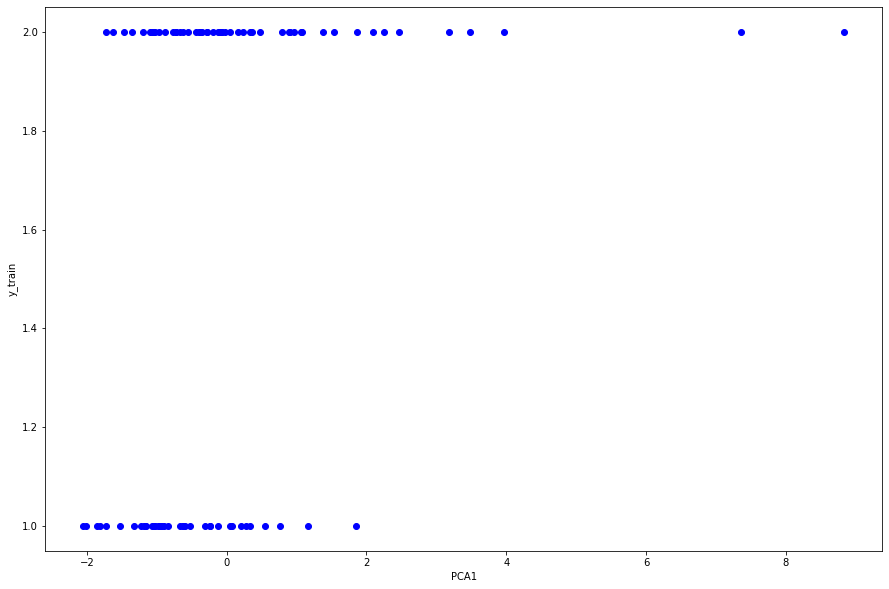

In [1481]:
plt.figure(figsize=(15, 10))
plt.scatter(pca1, y_train, c='blue')
plt.xlabel('PCA1')
plt.ylabel('y_train')
plt.show()

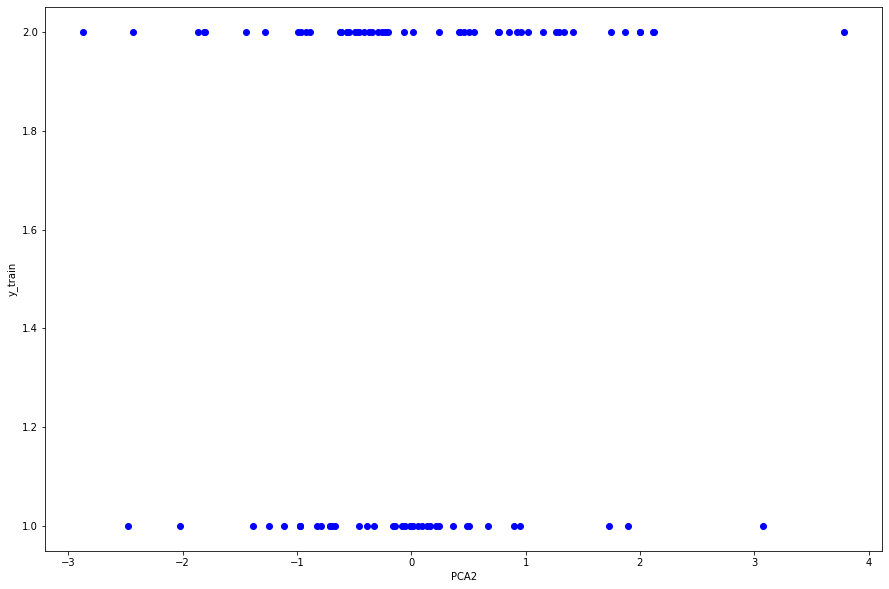

In [1482]:
plt.figure(figsize=(15, 10))
plt.scatter(pca2, y_train, c='blue')
plt.xlabel('PCA2')
plt.ylabel('y_train')
plt.show()

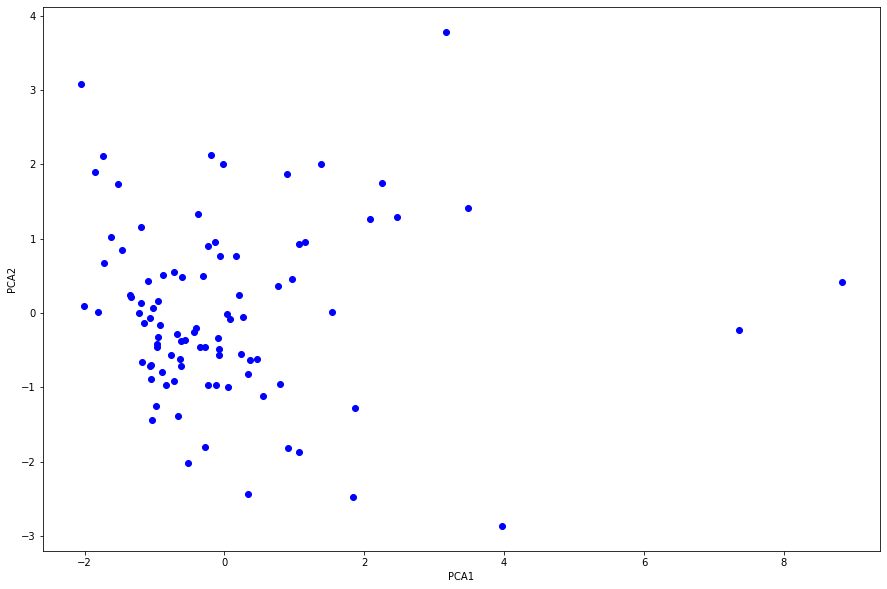

In [1483]:
plt.figure(figsize=(15, 10))
plt.scatter(pca1, pca2, c='blue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

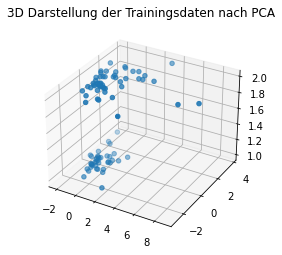

In [1484]:
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca1, pca2, y_train)
plt.title('3D Darstellung der Trainingsdaten nach PCA')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


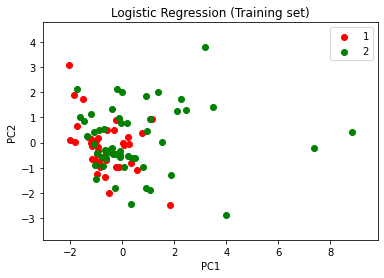

In [1485]:
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
	            c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

### es ist keine gute separierbarkeit erkennbar
#### da die roten und grünen Punkte konzentriert auftreten, lassen sich diese nicht leicht separieren

In [1486]:
pcat1, pcat2 = x_test.T

In [1487]:
print(x_train)

[[ 4.71863281e-01 -6.14340250e-01]
 [-8.91662921e-01 -7.89291413e-01]
 [-1.02231175e+00  6.32504171e-02]
 [-2.05236973e+00  3.08041584e+00]
 [-1.80547254e+00  1.20775510e-02]
 [ 5.47917594e-01 -1.11134505e+00]
 [-9.75627351e-01 -1.24601980e+00]
 [-1.06271700e+00 -7.08780823e-01]
 [-4.40979599e-01 -2.59937829e-01]
 [-1.97874651e-02  2.00252576e+00]
 [ 8.97584062e-01  1.86779413e+00]
 [-6.23748845e-01 -3.82653538e-01]
 [-9.61524600e-01 -4.16482177e-01]
 [-2.83414428e-01 -4.54323447e-01]
 [-1.19864173e+00  1.15254974e+00]
 [ 3.97434242e+00 -2.86919749e+00]
 [-7.65951179e-01 -5.62866664e-01]
 [-3.12407034e-01  5.04042066e-01]
 [-2.77960811e-01 -1.80296278e+00]
 [-9.46515539e-02 -3.39739246e-01]
 [ 7.35927691e+00 -2.26072692e-01]
 [-1.04417713e+00 -6.96928353e-01]
 [-9.18422582e-01 -1.62650346e-01]
 [ 3.59139458e-01 -6.26248387e-01]
 [ 8.83151309e+00  4.15580747e-01]
 [-7.28475299e-01 -9.16949539e-01]
 [-5.16910017e-01 -2.02048621e+00]
 [-3.57066291e-01 -4.62023028e-01]
 [-1.18840497e+00  1

In [1488]:
pca_result = pca.explained_variance_ratio_
print('pca1 benutzt ', pca_result[0])
print('pca2 benutzt ', pca_result[1])

pca1 benutzt  0.3603753756047827
pca2 benutzt  0.17330033163656172


pca benutzt ca. 36% der infos und pca2 ca. 17% -- somit werden ca. 47% der Infos fallen gelassen

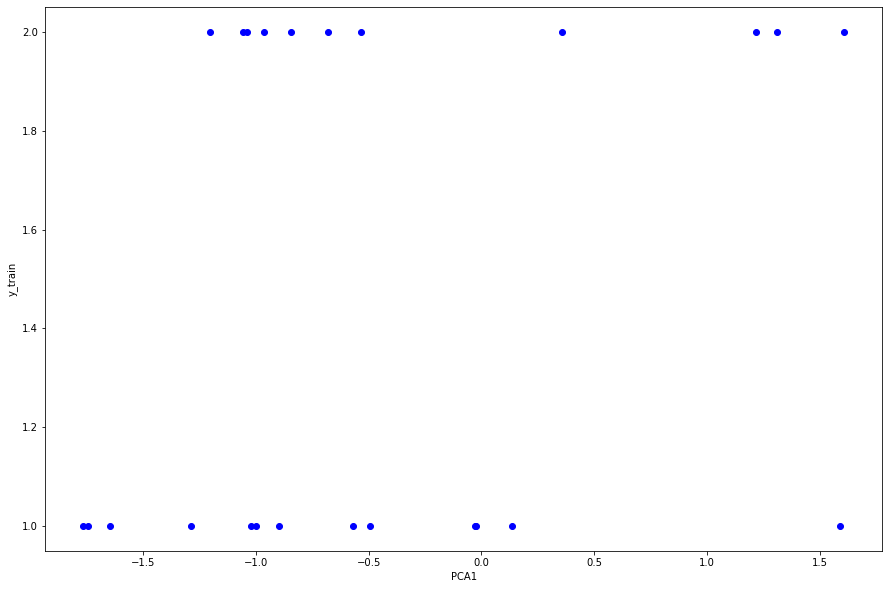

In [1489]:
plt.figure(figsize=(15, 10))
plt.scatter(pcat1, y_test, c='blue')
plt.xlabel('PCA1')
plt.ylabel('y_train')
plt.show()

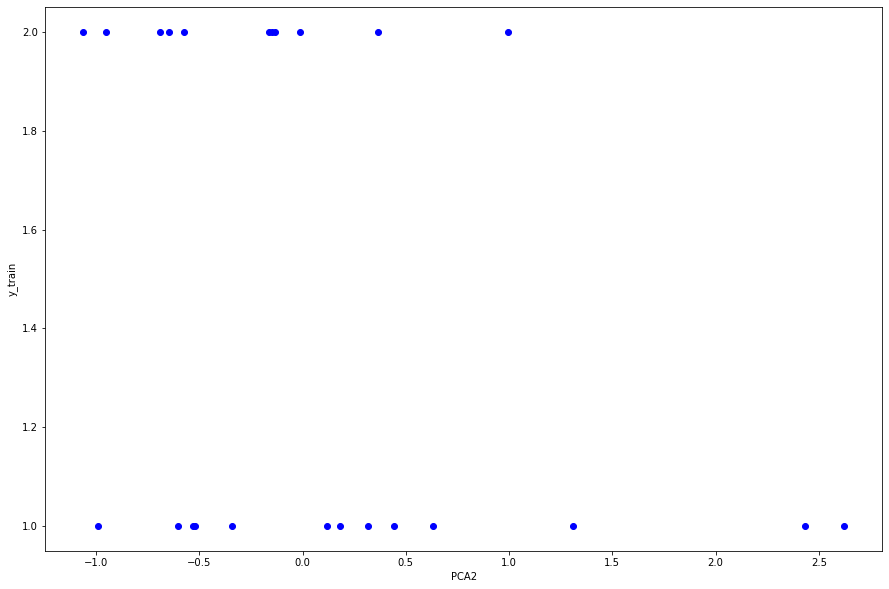

In [1490]:
plt.figure(figsize=(15, 10))
plt.scatter(pcat2, y_test, c='blue')
plt.xlabel('PCA2')
plt.ylabel('y_train')
plt.show()

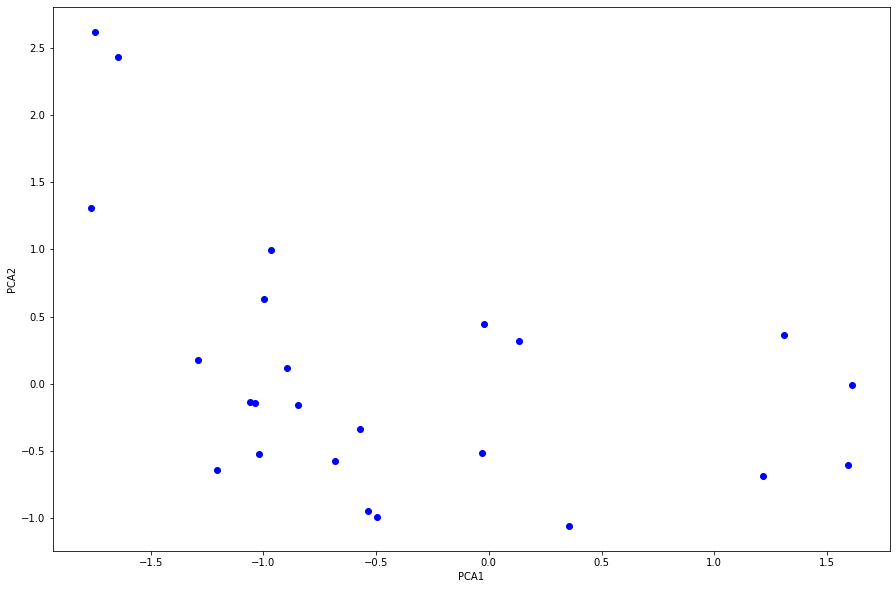

In [1491]:
plt.figure(figsize=(15, 10))
plt.scatter(pcat1, pcat2, c='blue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

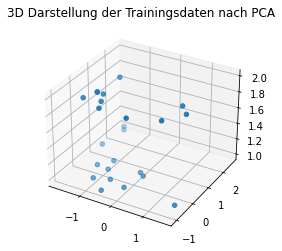

In [1492]:
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcat1, pcat2, y_test)
plt.title('3D Darstellung der Trainingsdaten nach PCA')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


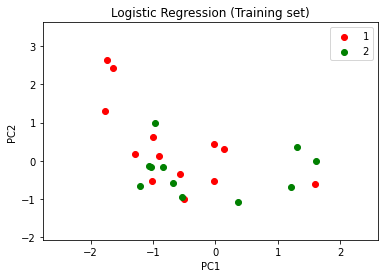

In [1493]:
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
	            c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

### es ist wieder keine gute separierbarkeit erkennbar
#### da die roten und grünen Punkte konzentriert auftreten, lassen sich diese nicht leicht separieren

In [1494]:
print(predict_y)
print(y_test)

[1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 2 2 1 2]
[1 2 1 2 1 2 1 2 2 1 1 1 2 2 1 1 2 2 1 2 1 2 1 1]


In [1495]:
counter = 0
for i in range(0, len(predict_y)):
	if predict_y[i] == y_test[i]:
		counter += 1
	else:
		continue

In [1496]:
var = counter / len(predict_y)
res = var * 100
print('Wahrscheinlichkeit für die richtige Vorhersage:')
print(res, '%')

Wahrscheinlichkeit für die richtige Vorhersage:
54.166666666666664 %


### Nach droppen einer Column ist die Wahrscheinlichkeit um 4% höher

# 6. KNN

In [1497]:
x = data.iloc[:, 0:9].values
y = data.iloc[:, 9].values

In [1498]:
data_train, data_test, class_train, class_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [1499]:
knn = KNeighborsClassifier(n_neighbors=3)

In [1500]:
knn.fit(data_train, class_train)

KNeighborsClassifier(n_neighbors=3)

In [1501]:
knn.predict(data_test)[0:5]

array([2, 2, 1, 2, 1], dtype=int64)

In [1502]:
class_test[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [1503]:
knn.score(data_test, class_test)

0.5

In [1504]:
k_max = 25
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, k_max + 1)}
knn_gcsv = GridSearchCV(knn2, param_grid, cv=5)
knn_gcsv.fit(data, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])})

<function matplotlib.pyplot.show(close=None, block=None)>

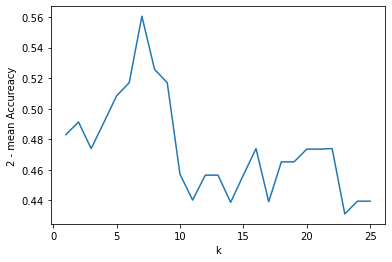

In [1505]:
mean_scores = knn_gcsv.cv_results_['mean_test_score']
plt.plot(np.arange(1, k_max + 1), 1.0 - mean_scores)
plt.xlabel('k')
plt.ylabel('2 - mean Accureacy')
plt.show


In [1506]:
knn_gcsv.best_params_

{'n_neighbors': 23}

In [1507]:
knn_gcsv.best_score_

0.5688405797101449

# Vergleich KNN und logistische Regression
### KNN ist besser (logistische Regression